<a href="https://colab.research.google.com/github/felipealima23/sigmoidal_data_science/blob/main/Analisando_os_Dados_do_Airbnb_Madrid_Espanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [felipealima23](https://github.com/felipealima23)*

---

# Análise dos Dados do Airbnb - *Madrid/Espanha*

<p align="center">
  <img src="https://images.unsplash.com/photo-1620134913518-e14280cfc6d8?q=80&w=1808&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="imagem maneira relacionada ao projeto"height=400px >
</p>

<p align="center">
Enamórate del Parque del Retiro de Madrid

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Madrid, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-09-11/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`	- Número de avaliações nos últimos doze meses (ltm-last twelve months)
* `license` - Número da licença da Airbnb, exigido por algumas prefeituras


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,902671779171769624,Habitación centro de Madrid 4,50080380,Rubens,Centro,Cortes,40.411812,-3.697614,Private room,NaN,7,3,2023-07-12,0.20,17,0,0,NaN
1,9753808,Habitación cuqui,41563621,Marie Rose,Centro,Embajadores,40.410970,-3.698240,Private room,NaN,1,1,2015-12-11,0.01,1,0,0,NaN
2,46899002,Habitación Doble con Baño Compartido,331096767,Sandra,San Blas - Canillejas,Rejas,40.444300,-3.565950,Private room,NaN,1,0,NaN,NaN,4,0,0,NaN
3,1125891241820979969,SB18-04 Habitación área exclusiva de Madrid,567327895,Santiago,Centro,Palacio,40.408240,-3.713480,Private room,NaN,7,0,NaN,NaN,95,0,0,NaN
4,49895335,Teste,86662970,Igor,Ciudad Lineal,San Juan Bautista,40.453560,-3.656380,Private room,200.0,1,0,NaN,NaN,1,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	26980
Variáveis:	18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]). sort_values(ascending=False)

,0
license,0.902520
price,0.219125
last_review,0.211156
reviews_per_month,0.211156
host_name,0.000111
host_id,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

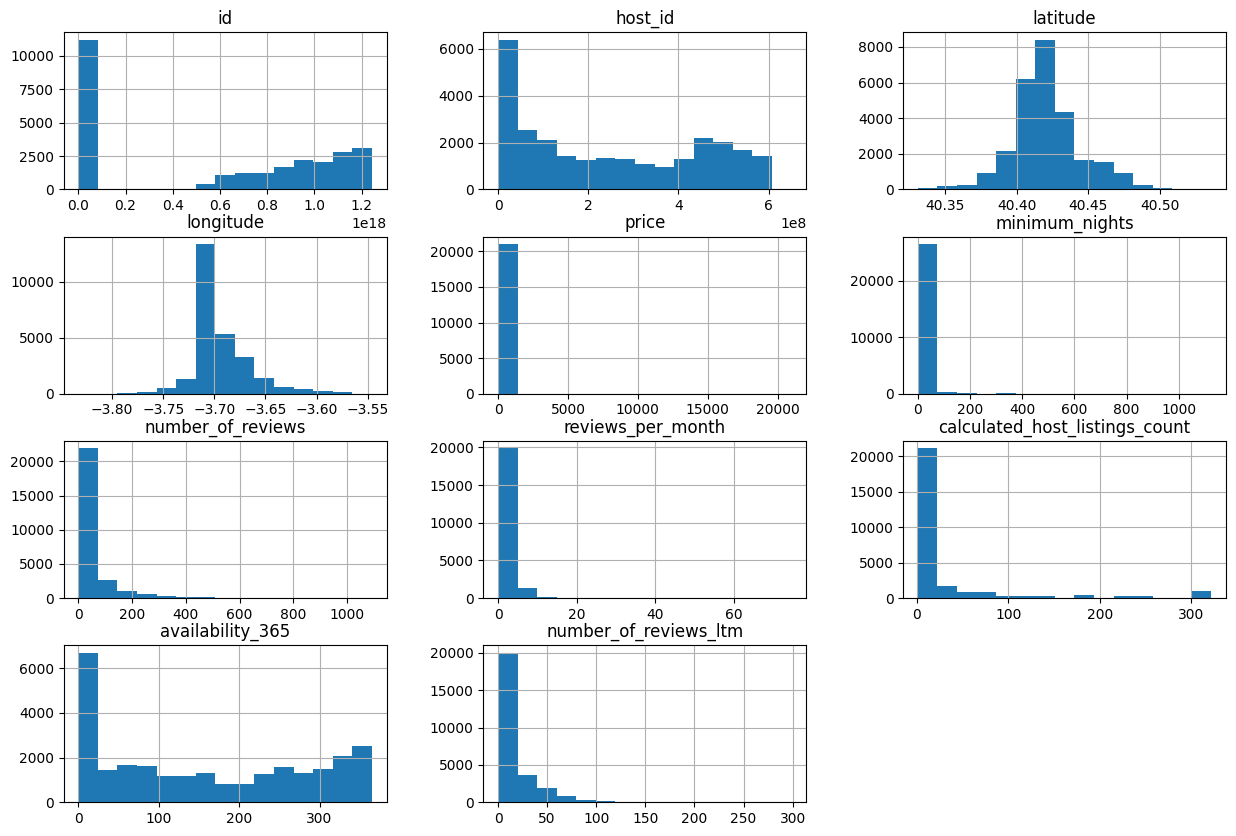

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df['price'].mean()


140.59844313651035

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,21068.000000,26980.000000,26980.000000,21283.000000,26980.000000,26980.000000,26980.000000
mean,140.598443,8.072090,45.568087,1.803267,30.265011,156.211527,14.161972
std,373.402540,30.823189,86.597952,2.003707,69.536971,128.596650,21.808388
min,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,62.000000,1.000000,1.000000,0.400000,1.000000,26.000000,0.000000
50%,101.000000,2.000000,10.000000,1.160000,3.000000,140.000000,4.000000
75%,153.000000,3.000000,49.000000,2.610000,17.000000,276.000000,20.000000
max,21000.000000,1125.000000,1092.000000,74.790000,322.000000,365.000000,299.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 153, porém seu valor máximo é 21000.
* A quantidade máxima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

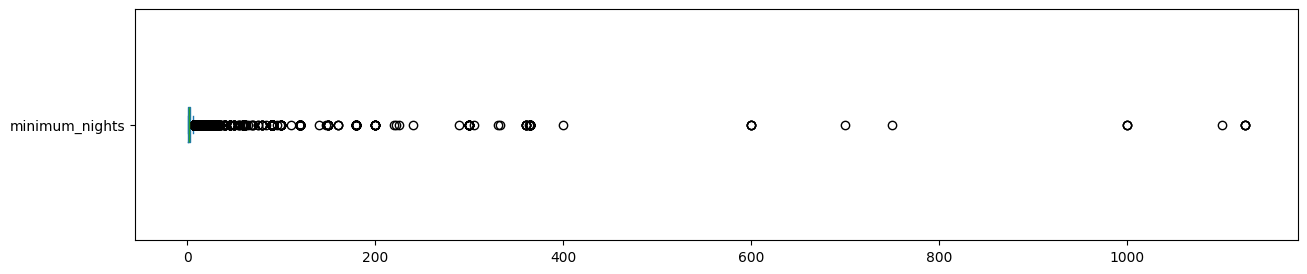

minimum_nights: valores acima de 30:
1327 entradas
4.9185%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

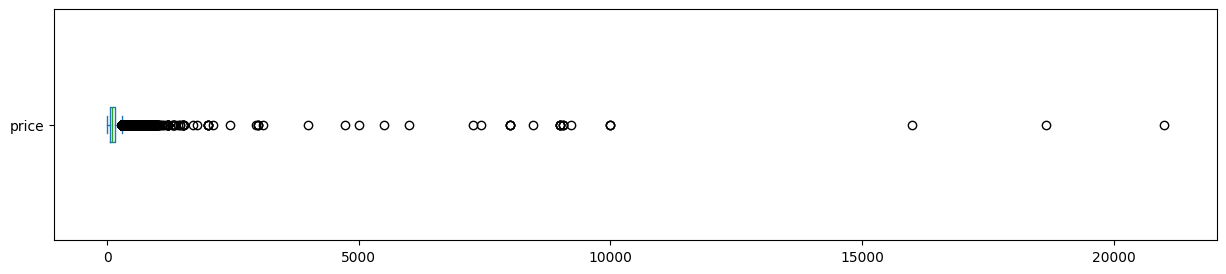


price: valores acima de 600
240 entradas
0.8895%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 900 para price
print("\nprice: valores acima de 600")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

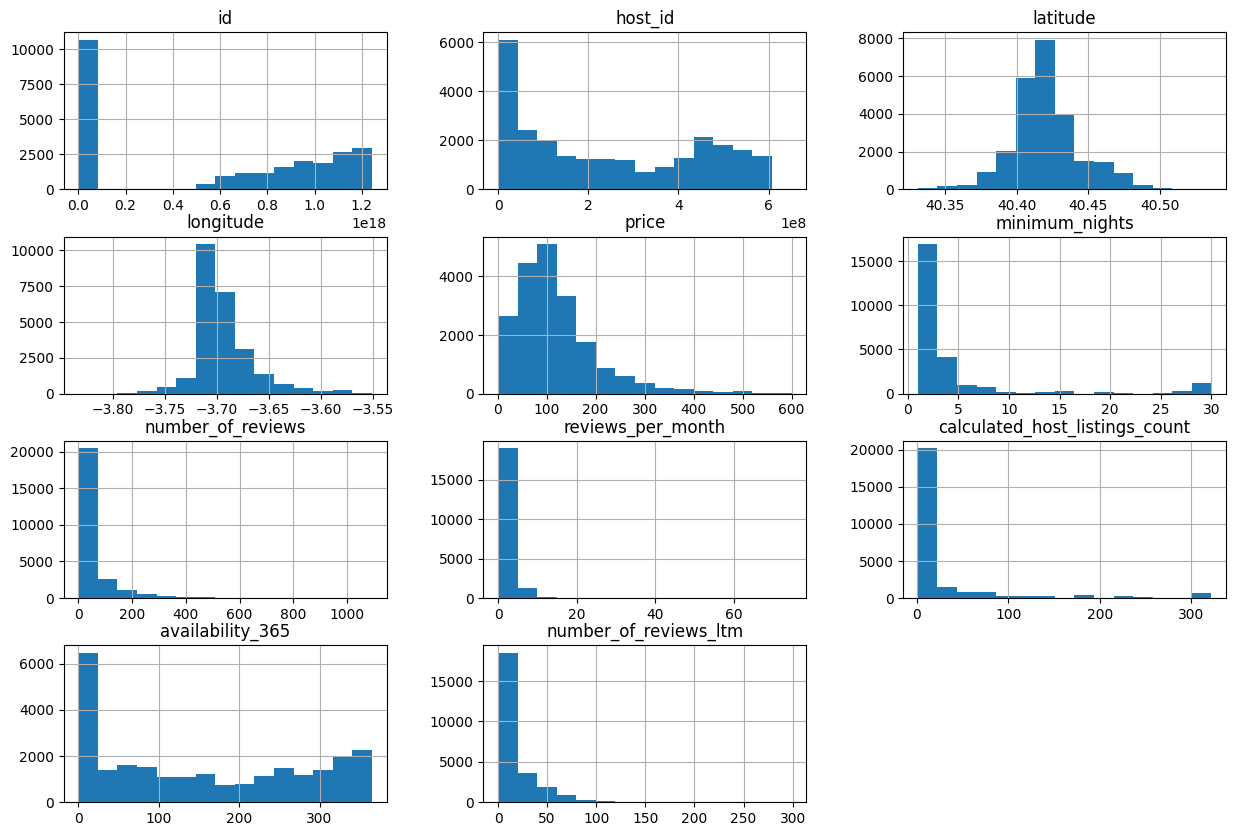

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.083665,0.010709,-0.060544,0.111532,0.045984
minimum_nights,-0.083665,1.000000,-0.121176,-0.186688,0.213003,-0.001412
number_of_reviews,0.010709,-0.121176,1.000000,0.508135,-0.068734,0.027242
reviews_per_month,-0.060544,-0.186688,0.508135,1.000000,-0.045213,0.077023
calculated_host_listings_count,0.111532,0.213003,-0.068734,-0.045213,1.000000,0.170891
availability_365,0.045984,-0.001412,0.027242,0.077023,0.170891,1.000000


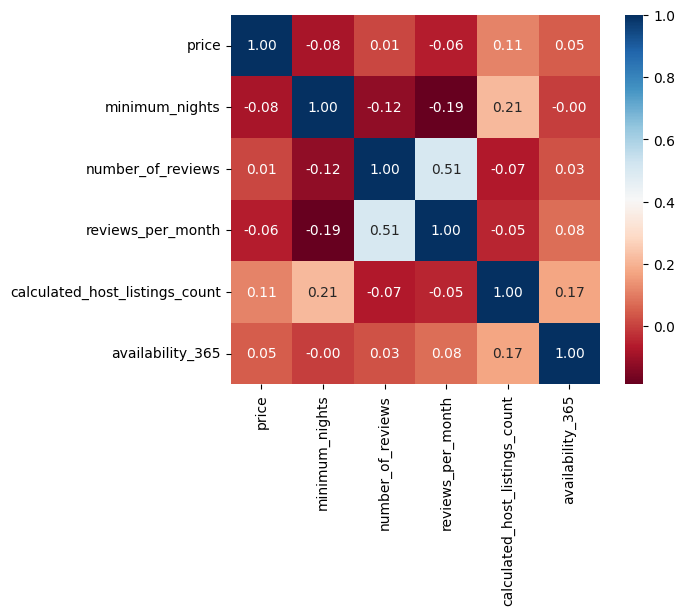

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


,count
room_type,
Entire home/apt,16293
Private room,8723
Shared room,323
Hotel room,83


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

,count
room_type,
Entire home/apt,0.640902
Private room,0.343128
Shared room,0.012706
Hotel room,0.003265


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False) [:10]

,price
neighbourhood,
Recoletos,202.328947
Castellana,187.975000
Goya,174.596958
Jerónimos,172.953488
Costillares,169.187500
Palomas,161.285714
Atalaya,160.000000
Sol,158.493186
Cortes,157.534104


Acima

In [ ]:
# ver quantidade de imovéis no Goya
print (df_clean[df_clean.neighbourhood == 'Goya'].shape)

(333, 17)


In [ ]:
# ver as entradas do Costillares
df_clean[df_clean.neighbourhood == 'Costillares']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
250,1042881690675337237,Habitación,487265080,Natalia,Costillares,40.483330,-3.671310,Private room,NaN,1,0,NaN,NaN,1,0,0,NaN
286,941115480814709754,Pinar de Chamartín habitación 2,510376330,Maria,Costillares,40.478201,-3.669656,Private room,49.0,3,0,NaN,NaN,3,240,0,NaN
954,35220138,Alquilo habitación luminosa,261200961,Mar,Costillares,40.480520,-3.666360,Private room,NaN,1,0,NaN,NaN,1,0,0,NaN
1614,34647639,Nice room with WC and private entrance available,93284669,Cecilia,Costillares,40.467650,-3.664820,Private room,NaN,2,0,NaN,NaN,1,0,0,NaN
1948,34991694,Apartamento,263630113,Pilar,Costillares,40.477260,-3.672990,Entire home/apt,600.0,1,0,NaN,NaN,1,179,0,NaN
2075,919274534071462524,Piso 22 en pinar de chanmartin!,254073850,Laura,Costillares,40.480694,-3.671237,Entire home/apt,176.0,7,0,NaN,NaN,1,263,0,NaN
3975,839616838648343562,Amplia Habitación,166934622,Beatriz,Costillares,40.479954,-3.665056,Private room,21.0,2,12,2023-09-24,0.67,3,164,1,NaN
4067,31461291,BAUSA 19 Apartamento de lujo con Piscina,235682224,Carlos,Costillares,40.468450,-3.668390,Entire home/apt,120.0,3,22,2024-08-05,0.33,1,251,7,VT1404
5593,1181696799368058869,"apartamento ideal, Arturo Soria",584181199,Alberto,Costillares,40.479569,-3.668843,Entire home/apt,92.0,4,1,2024-07-14,0.50,2,240,1,NaN
5905,1233993735241079946,Estudio Deluxe en Arturo Soria by Rent Me,316795838,Renthas Hospitality,Costillares,40.468275,-3.667038,Entire home/apt,127.0,4,0,NaN,NaN,16,187,0,NaN


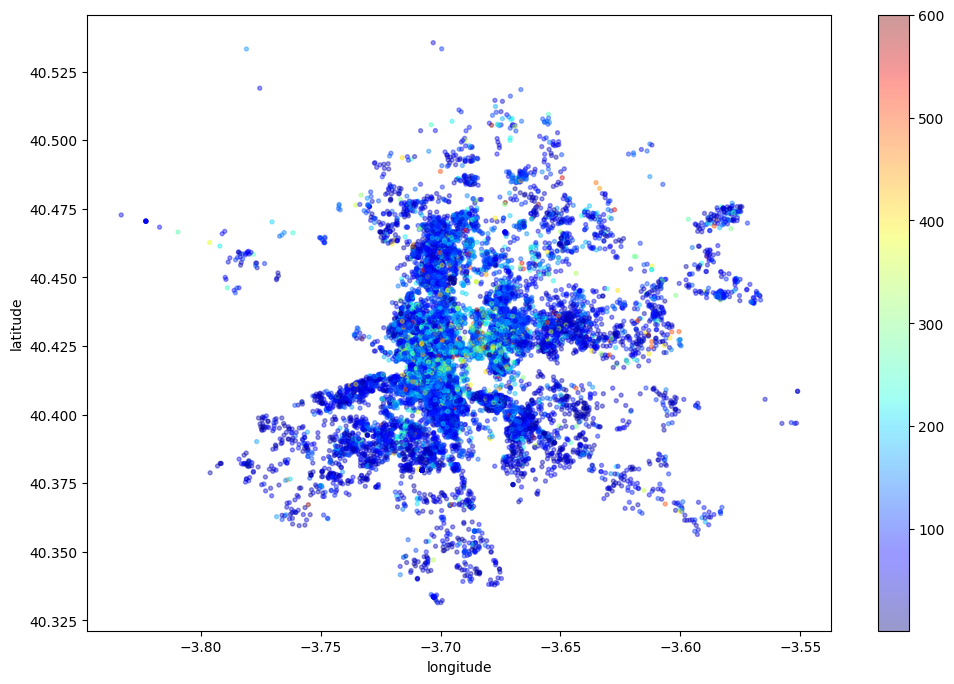

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

4.233852568641335

## Conclusões


Este estudo analisou dados do Airbnb de Madrid para explorar informações sobre hospedagens. O conjunto de dados foi avaliado em termos de tamanho, qualidade e distribuição das variáveis, revelando informações importantes, como o preço médio, a disponibilidade anual e o número mínimo de noites exigido pelos anfitriões. Foram identificadas variações significativas nos preços e nos períodos de estadia, indicando a presença de valores fora do padrão. A análise sugere que bairros específicos podem ter hospedagens mais caras ou populares e que fatores como preço e número de avaliações podem influenciar a demanda.